<a href="https://colab.research.google.com/github/agamthind96/Data-Analysis/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Relationship study between a discrete dependent variable and atleast one independent variable.

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [2]:
# Import the required libraries
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load the data
df = pd.read_csv("spam.csv")
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


## Data Analysis

In [4]:
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


## Histograms


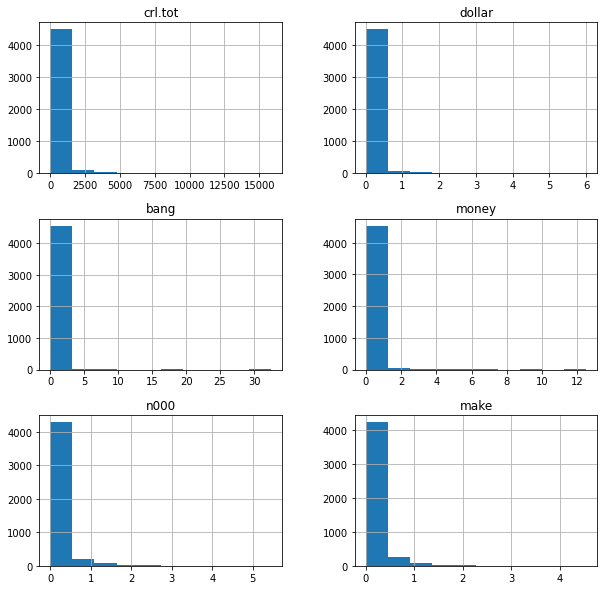

In [5]:
df.hist(figsize=(10,10));

In [6]:
## Removing Outliers
print(len(df))
df = df[df["crl.tot"] < 1500]
print(len(df))
df = df[df["bang"] < 5]
print(len(df))
df = df[df["money"] < 7]
print(len(df))
df = df[df["n000"] < 2]
print(len(df))
df = df[df["dollar"] < 2]
print(len(df))

4601
4462
4439
4435
4404
4396


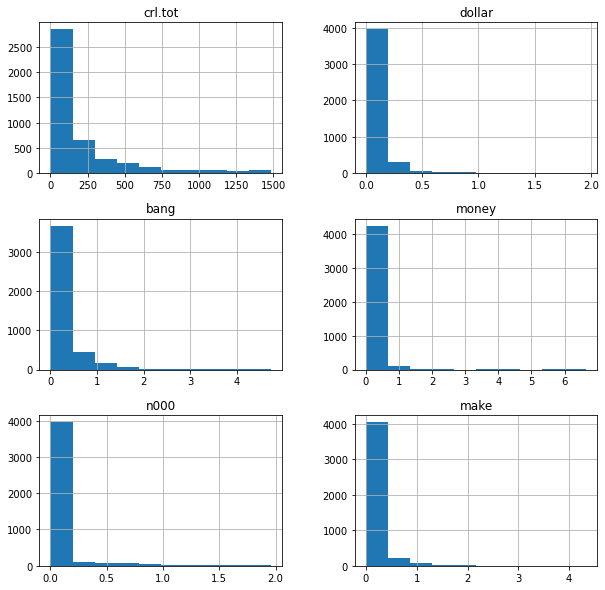

In [7]:
df.hist(figsize=(10,10));

## Correlation Matrix

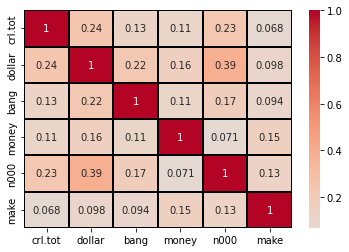

In [8]:
sns.heatmap(df.corr(),
            annot=True,
            fmt='.2g',
            center=0,
            cmap='coolwarm',
            linewidths=1,
            linecolor='black');

## Logistic Regression Preparation

In [9]:
# Prepare dependent variable.
df['yesno'] = np.where(df["yesno"] == "y", 1, 0)
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.00,0.778,0.00,0.00,0.00,1
1,1028,0.18,0.372,0.43,0.43,0.21,1
3,191,0.00,0.137,0.00,0.00,0.00,1
4,191,0.00,0.135,0.00,0.00,0.00,1
5,54,0.00,0.000,0.00,0.00,0.00,1


In [10]:
# Prepare X & y
y = df["yesno"]
X = df.drop("yesno",axis=1)
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:
X.head()

,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21
3,1.0,191,0.00,0.137,0.00,0.00,0.00
4,1.0,191,0.00,0.135,0.00,0.00,0.00
5,1.0,54,0.00,0.000,0.00,0.00,0.00


In [12]:
## Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=1502)

## Fit the Logistic Regression model.

In [13]:
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.384609
         Iterations 8


In [14]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3516
Model:                          Logit   Df Residuals:                     3509
Method:                           MLE   Df Model:                            6
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.4211
Time:                        07:03:46   Log-Likelihood:                -1352.3
converged:                       True   LL-Null:                       -2335.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1954      0.074    -29.661      0.000      -2.340      -2.050
crl.tot        0.0017      0.000      9.015      0.000       0.001       0.002
dollar         6.9325      0.697      9.939      0.0

In [15]:
# Create a function to read the coefficients.
def logistic_reader(coefficient):
  probability = abs(round((np.exp(coefficient)-1)*100, 2))
  if probability>0:
    print(f'The likelihood increases by {probability} %.')
  elif probability==0:
    print('No Impact')
  else:
    print(f'The likelihood decreases by {(probability)} %.')

In [16]:
# Apply the function
logistic_reader(0.0017)

The likelihood increases by 0.17 %.


In [17]:
logistic_reader(-0.5)

The likelihood increases by 39.35 %.


## Assess the model


In [20]:
predictions = model.predict(X_test)
predictions = np.where(predictions>0.5,1,0)
predictions[:5]

array([1, 0, 0, 0, 0])

- Accuracy is used for balanced dataset and F1-score is used for unbalanced 
dataset.
- Specificity or True Negative Rate = (TN)/(TN+FP) (when we focus on False valu accuracy)
- Sensitivity or Recall or True Positive Rate = (TP)/(TP+FN)  (focus on True values)

In [21]:
## Check if dataset is balanced
y_test.value_counts()

0    561
1    319
Name: yesno, dtype: int64

### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp = confusion_matrix(y_true=y_test, y_pred=predictions).ravel()


In [28]:
def confusion_matrix_output(y_true,y_pred):
  """
  Takes the true and predicted values and outputs the 4 terms of confusion matrix.
  """
  from sklearn.metrics import confusion_matrix
  tn,fp,fn,tp = confusion_matrix(y_true=y_true, y_pred=y_pred).ravel()
  print(f' True Positive : {tp} \n False Negative : {fn} \n False Positive : {fp} \n True Negative : {tn}.')


In [29]:
confusion_matrix_output(y_test,predictions)

 True Positive : 217 
 False Negative : 102 
 False Positive : 41 
 True Negative : 520.


In [33]:
def model_assessment(y_true,y_pred):
  """
  Takes the true and predicted values and outputs the accuracy, f1_score, true_positive_rate, true_negative_rate
  """
  from sklearn.metrics import confusion_matrix
  tn,fp,fn,tp = confusion_matrix(y_true=y_true, y_pred=y_pred).ravel()
  accuracy = round((tp+tn)/(tp+tn+fp+fn),2)
  print(f'Accuracy of the model is {accuracy*100}%.')
  f1_score = round((2*tp)/(2*tp+fn+fp),2)
  print(f'F1-Score of the model is {f1_score*100}%.')
  specificity = round((tn)/(tn+fp),2)
  print(f'True Negative Rate of Specificity of the model is {specificity*100}%.')
  sensitivity = round((tp)/(tp+fn),2)
  print(f'True Postive Rate ot Sensitivity of the model is {sensitivity*100}%.')

In [34]:
model_assessment(y_test,predictions)

Accuracy of the model is 84.0%.
F1-Score of the model is 75.0%.
True Negative Rate of Specificity of the model is 93.0%.
True Postive Rate ot Sensitivity of the model is 68.0%.


### Classification Report

In [35]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       561
           1       0.84      0.68      0.75       319

    accuracy                           0.84       880
   macro avg       0.84      0.80      0.82       880
weighted avg       0.84      0.84      0.83       880

